# Google stock price prediction using LSTM Cell-based RNN

In [1]:
#import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
datasets_train = pd.read_csv("D:\\Desktop\\datasets\\Emoji\\google stock\\Google_Stock_Price_Train.csv")

In [5]:
datasets_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [67]:
training_set = datasets_train.iloc[:,1:2].values

In [68]:
# Select Open stocks
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [72]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [17]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [18]:
# Creating a data structure with 60 time step back 
# according to LSTM to retaing the patternt from previous stage

x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train = np.array(x_train), np.array(y_train)


In [19]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [20]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [24]:
# Reshaping 
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [25]:
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

# RNN + LSTM Model

In [33]:
# Building RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout

# Intialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a fouth LSTM layer and Dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Adding the Output Layer
regressor.add(Dense(units=1))

#compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

regressor.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 50)               

In [35]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 17s 130ms/step - loss: 0.1013 - accuracy: 5.0396e-04
Epoch 2/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0064 - accuracy: 0.0022
Epoch 3/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0058 - accuracy: 5.8368e-04
Epoch 4/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0051 - accuracy: 8.4030e-040s - loss: 0.0051 - accuracy: 7.70
Epoch 5/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0052 - accuracy: 0.0010
Epoch 6/100
38/38 [==============================] - 6s 159ms/step - loss: 0.0050 - accuracy: 0.0018
Epoch 7/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0044 - accuracy: 0.0018
Epoch 8/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0061 - accuracy: 0.0011
Epoch 9/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0044 - accuracy: 0.0032
Epoch 10/100
38/38 [========================

In [64]:
dataset_test = pd.read_csv("D:\\Desktop\\datasets\\Emoji\\google stock\\Google_Stock_Price_Test.csv")

In [65]:
real_stock_price= testing_data.iloc[:,1:2].values

In [70]:
from sklearn.preprocessing import StandardScaler

# Visualizing the Stocks

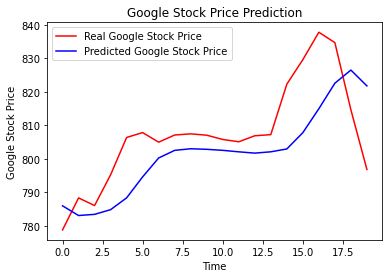

In [82]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()



In [83]:
predicted_stock_price

array([[785.99945],
       [783.1052 ],
       [783.4551 ],
       [784.8523 ],
       [788.37994],
       [794.6429 ],
       [800.28033],
       [802.5553 ],
       [803.0342 ],
       [802.8685 ],
       [802.5607 ],
       [802.1182 ],
       [801.72894],
       [802.1233 ],
       [802.9707 ],
       [807.83234],
       [814.978  ],
       [822.5949 ],
       [826.52313],
       [821.7926 ]], dtype=float32)

In [85]:
real_test_ouput = dataset_test['Close']

In [86]:
real_test_ouput

0     786.14
1     786.90
2     794.02
3     806.15
4     806.65
5     804.79
6     807.91
7     806.36
8     807.88
9     804.61
10    806.07
11    802.17
12    805.02
13    819.31
14    823.87
15    835.67
16    832.15
17    823.31
18    802.32
19    796.79
Name: Close, dtype: float64

In [90]:
# Score

y_pred = regressor.predict(X_test)

In [94]:
# Show the accuracy at each steps
y_pred

array([[0.9429262 ],
       [0.93754226],
       [0.9381931 ],
       [0.9407923 ],
       [0.9473547 ],
       [0.9590053 ],
       [0.9694924 ],
       [0.9737245 ],
       [0.9746153 ],
       [0.9743072 ],
       [0.97373456],
       [0.9729113 ],
       [0.9721873 ],
       [0.9729207 ],
       [0.9744972 ],
       [0.98354113],
       [0.99683386],
       [1.0110033 ],
       [1.0183108 ],
       [1.0095108 ]], dtype=float32)

In [95]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_test_ouput, predicted_stock_price))
rmse

14.40858878382992